In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-29 10:20:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.60MB/s    in 37s     

2020-06-29 10:21:24 (8.35 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [7]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# menentukan base direktori
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [8]:
# mengimplementasikan augmentasi gambar dan membagi dataset menjadi train set 80% dan validation set 20%
augmentasi_gambar = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range=20,
                        vertical_flip = True,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest',
                        validation_split = 0.2
)

# train set
train_generator = augmentasi_gambar.flow_from_directory(
                      base_dir, # direktori data 
                      target_size = (224, 224), # mengubah resolusi seluruh gambar menjadi 224x224 piksel            
                      class_mode = 'categorical', # karena kita merupakan masalah klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical'
                      subset = 'training' # menentukan generator sebagai training
)

# validation set
validation_generator = augmentasi_gambar.flow_from_directory(
                      base_dir, # direktori data 
                      target_size = (224, 224), # mengubah resolusi seluruh gambar menjadi 224x224 piksel
                      class_mode = 'categorical', # karena kita merupakan masalah klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical'
                      subset = 'validation' # menentukan generator sebagai validasi
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [17]:
# membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # karena 3 kelas maka menggunakan fungsi aktivasi softmax
    tf.keras.layers.Dense(3, activation='softmax') 
])

In [18]:
# menentukan loss function dan optimizer pada CNN
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
# melatih model kita menggunakan metode fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)


Epoch 1/10
25/25 [==============================] - 100s 4s/step - loss: 1.1824 - accuracy: 0.3767 - val_loss: 0.9630 - val_accuracy: 0.5219
Epoch 2/10
25/25 [==============================] - 104s 4s/step - loss: 0.8621 - accuracy: 0.5992 - val_loss: 0.7609 - val_accuracy: 0.6875
Epoch 3/10
25/25 [==============================] - 101s 4s/step - loss: 0.6247 - accuracy: 0.7600 - val_loss: 0.4442 - val_accuracy: 0.8656
Epoch 4/10
25/25 [==============================] - 99s 4s/step - loss: 0.3388 - accuracy: 0.8748 - val_loss: 0.3632 - val_accuracy: 0.8813
Epoch 5/10
25/25 [==============================] - 100s 4s/step - loss: 0.2675 - accuracy: 0.9115 - val_loss: 0.2086 - val_accuracy: 0.9156
Epoch 6/10
25/25 [==============================] - 100s 4s/step - loss: 0.2438 - accuracy: 0.9162 - val_loss: 0.2454 - val_accuracy: 0.9031
Epoch 7/10
25/25 [==============================] - 100s 4s/step - loss: 0.2048 - accuracy: 0.9330 - val_loss: 0.1480 - val_accuracy: 0.9500
Epoch 8/10
25/

Saving rock.png to rock.png
rock.png
[[0. 1. 0.]]
batu


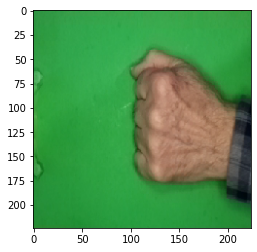

In [25]:
# melihat hasil model dengan secara interaktif memilih sebuah berkas gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  
  print(fn)
  print(classes)
  if(classes[0][0] == 1):
      print('kertas')
  elif(classes[0][1] == 1):
      print('batu')
  elif(classes[0][2] == 1):
      print('gunting')